**Task**:
    
    Clustering tutorial with scikit-learn

**References**:

1. [Unsupervised Learning with Python](https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03)
1. [sklearn.cluster.KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
1. [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html)
1. [seaborn scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) 
1. [stackoverflow clustering results changes scikit-learn](https://stackoverflow.com/questions/25921762/changes-of-clustering-results-after-each-time-run-in-python-scikit-learn) 

In [16]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [34]:
iris_ds = datasets.load_iris()
target_names = iris_ds.target_names.tolist()
print(iris_ds.feature_names)
print(target_names)
print("iris_ds.target=", iris_ds.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']
iris_ds.target= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1, verbose=0, random_state=0)
model.fit(iris_ds.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [19]:
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])
print("predicted_label", predicted_label)

predicted_label [0]


In [20]:
all_predictions = model.predict(iris_ds.data)
print("all_predictions", all_predictions)

all_predictions [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [38]:
# https://stackoverflow.com/a/46379878
df_iris = pd.DataFrame(iris_ds.data, columns=iris_ds.feature_names)
df_iris['target'] = list(map(lambda i: target_names[i], iris_ds.target)) 
df_iris["kmeans"] = list(map(lambda i: target_names[i], all_predictions)) 
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,kmeans
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


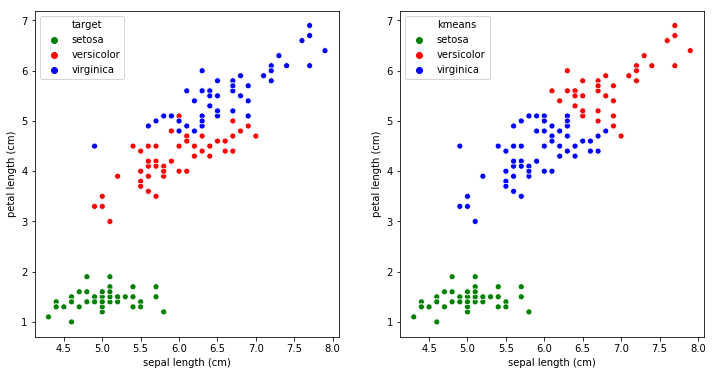

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2)  # sharey=True
fig.set_size_inches(12,6) 
#cm = {0: 'red', 1: 'blue', 2: 'green'}
cm = {'versicolor': 'red', 'virginica': 'blue', 'setosa': 'green'}
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", data=df_iris, ax=ax1, hue="target", palette=cm)
cm2 = {'versicolor': 'red', 'virginica': 'blue', 'setosa': 'green'}
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", data=df_iris, ax=ax2, hue="kmeans", palette=cm)